<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Random Forest Scikit-Learn API**



In [12]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


# **Random Forest for Classification**

In [13]:
# test classification dataset
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can evaluate a random forest algorithm on this dataset.

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

In [14]:
import numpy as np
# evaluate random forest algorithm for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define dataset
X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=15,
                           n_redundant=5,
                           random_state=3)

# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10,
                             n_repeats=3,
                             random_state=1)

n_scores = cross_val_score(model, X, y,
                           scoring='accuracy',
                           cv=cv, n_jobs=-1,
                           error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.907 (0.028)


The example below demonstrates this on our binary classification dataset.

In [15]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# define the model
model = RandomForestClassifier()

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,
        -0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,
        8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,
        0.6975331,0.26076035]]
        
y_pred = model.predict(row)
print('Predicted Class: %d' % y_pred[0])

Predicted Class: 0


# **Random Forest for Regression**

In [16]:
# test regression dataset
from sklearn.datasets import make_regression

# define dataset
X, y = make_regression(n_samples=1000,
                       n_features=20, 
                       n_informative=15, 
                       noise=0.1, 
                       random_state=2)

# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [17]:
import numpy as np
# Evaluate random forest ensemble for regression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# define dataset
X, y = make_regression(n_samples=1000,
                       n_features=20,
                       n_informative=15,
                       noise=0.1,
                       random_state=2)
# define the model
model = RandomForestRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10,
                   n_repeats=3,
                   random_state=1)

n_scores = cross_val_score(model, X, y,
                           scoring='neg_mean_absolute_error',
                           cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: {%.3f}, cross-validation Score {%.3f}' % (np.mean(n_scores), np.std(n_scores)))

MAE: {-90.473}, cross-validation Score {7.836}


we can see the **random forest ensemble** with default hyperparameters achieves a MAE of about 90.

In [18]:
# Random forest for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# define dataset
X, y = make_regression(n_samples=1000,
                       n_features=20,
                       n_informative=15,
                       noise=0.1,
                       random_state=2)

# define the model
model = RandomForestRegressor()

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
y_pred = model.predict(row)
print('Prediction: %d' % y_pred[0])

Prediction: -155


## __Random Forest Hyperparameters__

### Explore Number of Samples

>0.1 0.859 (0.026)
>0.2 0.877 (0.027)
>0.3 0.886 (0.027)
>0.4 0.891 (0.024)
>0.5 0.898 (0.025)
>0.6 0.902 (0.027)
>0.7 0.899 (0.027)
>0.8 0.904 (0.024)
>0.9 0.904 (0.026)
>1.0 0.905 (0.025)


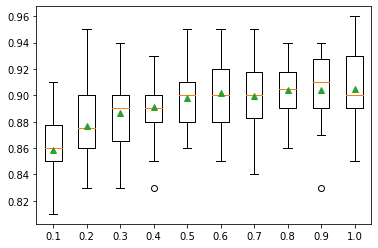

In [19]:
import numpy as np
# explore random forest bootstrap sample size on performance
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000,
                            n_features=20,
                            n_informative=15,
                            n_redundant=5,
                            random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Explore Number of Features

>1 0.894 (0.024)
>2 0.903 (0.027)
>3 0.901 (0.024)
>4 0.900 (0.025)
>5 0.897 (0.026)
>6 0.900 (0.025)
>7 0.892 (0.023)


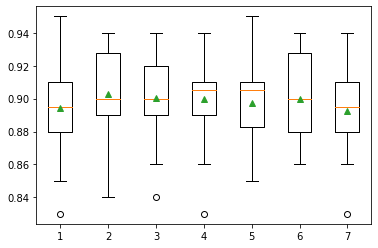

In [20]:
import numpy as np
# explore random forest number of features effect on performance
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, 
                            n_features=20, 
                            n_informative=15, 
                            n_redundant=5, 
                            random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### __Explore Number of Trees__

>10 0.868 (0.030)
>50 0.895 (0.030)
>100 0.906 (0.021)
>500 0.907 (0.025)
>1000 0.907 (0.024)


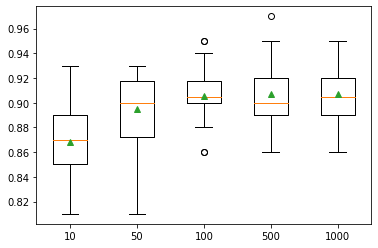

In [21]:
import numpy as np
# explore random forest number of trees effect on performance
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### __Explore Tree Depth__

>1 0.771 (0.035)
>2 0.809 (0.042)
>3 0.837 (0.030)
>4 0.853 (0.031)
>5 0.871 (0.026)
>6 0.881 (0.025)
>7 0.892 (0.029)
>None 0.909 (0.028)


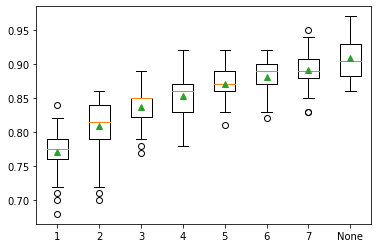

In [22]:
import numpy as np
# explore random forest tree depth effect on performance
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## **Common Questions**

In this section we will take a closer look at some common sticking points you may have with the radom forest ensemble procedure.

**Q. What algorithm should be used in the ensemble?**

Random forest is designed to be an ensemble of decision tree algorithms.

**Q. How many ensemble members should be used?**

The number of trees should be increased until no further improvement in performance is seen on your dataset.

As a starting point, we suggest using at least 1,000 trees. If the cross-validation performance profiles are still improving at 1,000 trees, then incorporate more trees until performance levels off.


**Q. Won’t the ensemble overfit with too many trees?**

No. Random forest ensembles (do not) are very unlikely to overfit in general.

Another claim is that random forests “cannot overfit” the data. It is certainly true that increasing [the number of trees] does not cause the random forest sequence to overfit …


**Q. How large should the bootstrap sample be?**

It is good practice to make the bootstrap sample as large as the original dataset size.

That is 100% the size or an equal number of rows as the original dataset.

**Q. How many features should be chosen at each split point?**

The best practice is to test a suite of different values and discover what works best for your dataset.

As a heuristic, you can use:

Classification: Square root of the number of features.
Regression: One third of the number of features.

**Q. What problems are well suited to random forest?**

Random forest is known to work well or even best on a wide range of classification and regression problems. Try it and see.


$$\textbf{Source}: {Jason}\space{Brownlee}\space{PhD}   -  Machine\space learning\space Mastery$$
